In [1]:
import os
import sys
root_folder = os.path.dirname(os.getcwd())
sys.path.append(root_folder)
from ResoFit._pulse_shape import NeutronPulse
from lmfit import Parameters
from lmfit import minimize
import numpy as np
import matplotlib.pyplot as plt
from lmfit import Model
from ResoFit.model import ikeda_carpenter
import pprint

In [2]:
# path1 = '/Users/Shawn/Dropbox (ORNL)/Postdoc_research/pulse_shape/source_section_1.dat'
# path2 = '/Users/Shawn/Dropbox (ORNL)/Postdoc_research/pulse_shape/source_section_2.dat'
path1 = '/Users/y9z/Dropbox (ORNL)/Postdoc_Research/pulse_shape/source_section_1.dat'
path2 = '/Users/y9z/Dropbox (ORNL)/Postdoc_Research/pulse_shape/source_section_2.dat'

In [3]:
neutron_pulse = NeutronPulse(path1)
neutron_pulse.load_shape_each(path2)
f = np.array(neutron_pulse.shape_dict[1]['data']['f_norm'])
t = np.array(neutron_pulse.shape_dict[1]['data']['t_us'])

In [4]:
my_model = Model(ikeda_carpenter)
print("Parameters: ", my_model.param_names)
print("Independent variable: ", my_model.independent_vars)

my_model.set_param_hint('alpha', value=0.699, min=0, max=20)
my_model.set_param_hint('beta', value=0.0215, min=0, max=20)
my_model.set_param_hint('fraction', value=0.383, min=0, max=1)
my_model.set_param_hint('t0', value=0.0889, min=0, max=20)
my_model.set_param_hint('norm_factor', value=1, min=0, vary=True)
params = my_model.make_params(verbose=True)

# my_model.print_param_hints()
print("+----------------- Fit neutron pulse shape -----------------+\nParams before:")
params.pretty_print()

Parameters:  ['alpha', 'beta', 'fraction', 't0', 'norm_factor']
Independent variable:  ['t']
 - Adding parameter "alpha"
 - Adding parameter "beta"
 - Adding parameter "fraction"
 - Adding parameter "t0"
 - Adding parameter "norm_factor"
+----------------- Fit neutron pulse shape -----------------+
Params before:
Name            Value      Min      Max   Stderr     Vary     Expr Brute_Step
alpha           0.699        0       20     None     True     None     None
beta           0.0215        0       20     None     True     None     None
fraction        0.383        0        1     None     True     None     None
norm_factor         1        0      inf     None     True     None     None
t0             0.0889        0       20     None     True     None     None


In [5]:
result = my_model.fit(f, params, t=t)

In [6]:
result.init_params

Parameters([('alpha', <Parameter 'alpha', 0.699, bounds=[0:20]>),
            ('beta', <Parameter 'beta', 0.0215, bounds=[0:20]>),
            ('fraction', <Parameter 'fraction', 0.383, bounds=[0:1]>),
            ('t0', <Parameter 't0', 0.0889, bounds=[0:20]>),
            ('norm_factor', <Parameter 'norm_factor', 1, bounds=[0:inf]>)])

In [7]:
result.init_values

{'alpha': 0.699,
 'beta': 0.0215,
 'fraction': 0.383,
 'norm_factor': 1,
 't0': 0.0889}

In [8]:
result.best_values

{'alpha': 1.3201730326775252,
 'beta': 0.19089892972538158,
 'fraction': 0.25858817427050373,
 'norm_factor': 3.5268939036343507,
 't0': 1.2392739860241542}

In [12]:
result.params

Parameters([('alpha',
             <Parameter 'alpha', value=1.3201730326775252 +/- 0.0201, bounds=[0:20]>),
            ('beta',
             <Parameter 'beta', value=0.19089892972538158 +/- 0.0311, bounds=[0:20]>),
            ('fraction',
             <Parameter 'fraction', value=0.25858817427050373 +/- 0.0165, bounds=[0:1]>),
            ('t0',
             <Parameter 't0', value=1.2392739860241542 +/- 0.00893, bounds=[0:20]>),
            ('norm_factor',
             <Parameter 'norm_factor', value=3.5268939036343507 +/- 0.0611, bounds=[0:inf]>)])

In [13]:
print(result.fit_report())

[[Model]]
    Model(ikeda_carpenter)
[[Fit Statistics]]
    # function evals   = 87
    # data points      = 56
    # variables        = 5
    chi-square         = 0.009
    reduced chi-square = 0.000
    Akaike info crit   = -476.485
    Bayesian info crit = -466.358
[[Variables]]
    alpha:         1.32017303 +/- 0.020144 (1.53%) (init= 0.699)
    beta:          0.19089892 +/- 0.031137 (16.31%) (init= 0.0215)
    fraction:      0.25858817 +/- 0.016539 (6.40%) (init= 0.383)
    t0:            1.23927398 +/- 0.008926 (0.72%) (init= 0.0889)
    norm_factor:   3.52689390 +/- 0.061065 (1.73%) (init= 1)
[[Correlations]] (unreported correlations are <  0.100)
    C(beta, norm_factor)         = -0.797 
    C(alpha, t0)                 =  0.734 
    C(alpha, fraction)           =  0.731 
    C(alpha, beta)               =  0.714 
    C(fraction, t0)              =  0.460 
    C(alpha, norm_factor)        = -0.376 
    C(beta, t0)                  =  0.338 
    C(beta, fraction)            =  

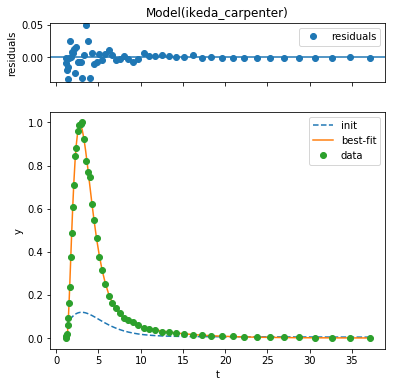

In [15]:
result.plot()

plt.show()

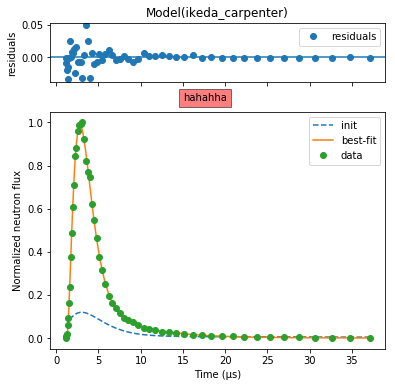

In [38]:
# result.plot(initfmt='None', init_kws={'label': '_nolegend_'})
# result.plot(initfmt='None', ylabel='Normalized neutron flux', xlabel='Time (µs)', ax_fit_kws={'fig_title': '1asdasd'})
# result.plot(initfmt='None', ylabel='Normalized neutron flux', xlabel='Time (µs)')
result.plot(ylabel='Normalized neutron flux', xlabel='Time (µs)')
plt.text(x=15, y=1.1, s='hahahha', horizontalalignment='center', verticalalignment='center',
        bbox=dict(facecolor='red', alpha=0.5))
plt.show()

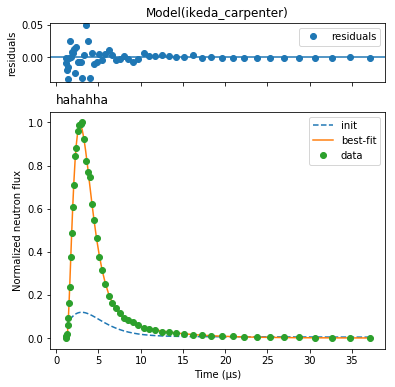

In [48]:
# result.plot(initfmt='None', init_kws={'label': '_nolegend_'})
# result.plot(initfmt='None', ylabel='Normalized neutron flux', xlabel='Time (µs)', ax_fit_kws={'fig_title': '1asdasd'})
# result.plot(initfmt='None', ylabel='Normalized neutron flux', xlabel='Time (µs)')
result.plot(ylabel='Normalized neutron flux', xlabel='Time (µs)')
plt.text(x=0, y=1.09, s='hahahha', fontsize=12)
plt.show()

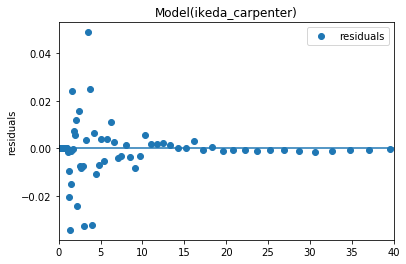

In [28]:
result.plot_residuals()
plt.xlim(left=0,
         right=40)
plt.show()

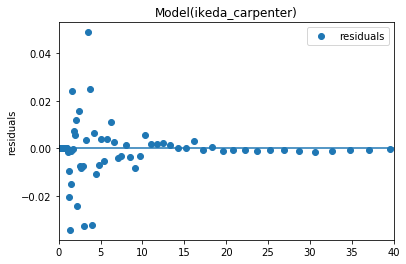

In [16]:
result.plot_residuals()
plt.xlim(left=0,
         right=40)
plt.show()

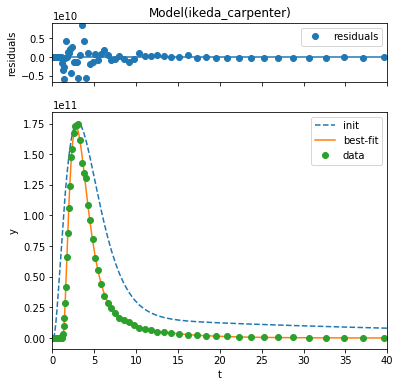

In [52]:
result = my_model.fit(f, params, t=t)
result.plot()
plt.xlim(left=0,
         right=40)
plt.show()

In [56]:
result.conf_interval()

OrderedDict([('alpha',
              [(0.99730020393673979, 1.2890802533725827),
               (0.95449973610364158, 1.299096208117712),
               (0.68268949213708585, 1.3094116478333886),
               (0.0, 1.3201634913494398),
               (0.68268949213708585, 1.3315096383832874),
               (0.95449973610364158, 1.3436199918850462),
               (0.99730020393673979, 1.3567915437928513)]),
             ('beta',
              [(0.99730020393673979, 0.1451245992954457),
               (0.95449973610364158, 0.15956686668332112),
               (0.68268949213708585, 0.17476164365706368),
               (0.0, 0.19087510363506699),
               (0.68268949213708585, 0.208117581170108),
               (0.95449973610364158, 0.2267379820030989),
               (0.99730020393673979, 0.2470499136166407)]),
             ('fraction',
              [(0.99730020393673979, 0.2810403784546158),
               (0.95449973610364158, 0.29255216595603617),
               (0.682689492

In [58]:
print(result.ci_report())

                99.73%    95.45%    68.27%    _BEST_    68.27%    95.45%    99.73%
 alpha      :  -0.03108  -0.02107  -0.01075   1.32016  +0.01135  +0.02346  +0.03663
 beta       :  -0.04575  -0.03131  -0.01611   0.19088  +0.01724  +0.03586  +0.05617
 fraction   :  -0.03423  -0.02272  -0.01136   0.31527  +0.01155  +0.02351  +0.03619
 t0         :  -0.01528  -0.01013  -0.00504   1.23927  +0.00505  +0.01019  +0.01539
 norm_factor:-19899217634.16748-13334847256.77466-6731555087.51306667854035084.67749+6934820238.98303+14176649133.37402+21842974730.58142


In [59]:
result.eval_uncertainty()

array([  0.00000000e+000,   0.00000000e+000,   0.00000000e+000,
         0.00000000e+000,   0.00000000e+000,   0.00000000e+000,
         0.00000000e+000,   0.00000000e+000,   0.00000000e+000,
         0.00000000e+000,   0.00000000e+000,   0.00000000e+000,
         0.00000000e+000,   0.00000000e+000,   0.00000000e+000,
         0.00000000e+000,   0.00000000e+000,   0.00000000e+000,
         0.00000000e+000,   0.00000000e+000,   0.00000000e+000,
         0.00000000e+000,   0.00000000e+000,   0.00000000e+000,
         0.00000000e+000,   0.00000000e+000,   0.00000000e+000,
         0.00000000e+000,   0.00000000e+000,   0.00000000e+000,
         0.00000000e+000,   0.00000000e+000,   0.00000000e+000,
         0.00000000e+000,   0.00000000e+000,   0.00000000e+000,
         0.00000000e+000,   0.00000000e+000,   0.00000000e+000,
         0.00000000e+000,   5.91875192e+007,   3.54644822e+008,
         5.14937220e+008,   5.72597796e+008,   5.62156122e+008,
         5.19563819e+008,   4.78675274e+

(0, 25000000000.0)

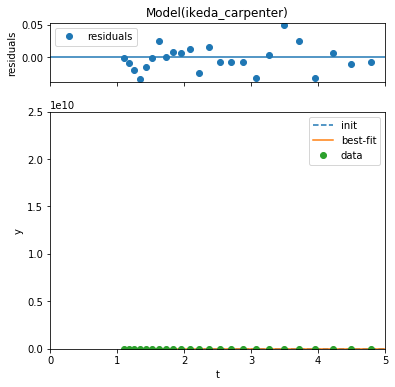

In [50]:
result.plot()
plt.ylim(ymin=0, ymax=2.5e10)


In [4]:
df = neutron_pulse.shape_dict[1]['data']
df

,t_us,f,s,f_norm,s_norm,E_eV
0,5.000000e-02,0.0,0.0,0.0,0.0,1.0
1,1.033000e-01,0.0,0.0,0.0,0.0,1.0
2,1.101300e-01,0.0,0.0,0.0,0.0,1.0
3,1.174000e-01,0.0,0.0,0.0,0.0,1.0
4,1.251500e-01,0.0,0.0,0.0,0.0,1.0
5,1.334200e-01,0.0,0.0,0.0,0.0,1.0
6,1.422300e-01,0.0,0.0,0.0,0.0,1.0
7,1.516300e-01,0.0,0.0,0.0,0.0,1.0
8,1.616400e-01,0.0,0.0,0.0,0.0,1.0
9,1.723200e-01,0.0,0.0,0.0,0.0,1.0


In [12]:
df_dropped = df.drop(df[df.f <= 0].index)
df_dropped.reset_index(drop=True, inplace=True)

In [14]:
df

,t_us,f,s,f_norm,s_norm,E_eV
0,5.000000e-02,0.0,0.0,0.0,0.0,1.0
1,1.033000e-01,0.0,0.0,0.0,0.0,1.0
2,1.101300e-01,0.0,0.0,0.0,0.0,1.0
3,1.174000e-01,0.0,0.0,0.0,0.0,1.0
4,1.251500e-01,0.0,0.0,0.0,0.0,1.0
5,1.334200e-01,0.0,0.0,0.0,0.0,1.0
6,1.422300e-01,0.0,0.0,0.0,0.0,1.0
7,1.516300e-01,0.0,0.0,0.0,0.0,1.0
8,1.616400e-01,0.0,0.0,0.0,0.0,1.0
9,1.723200e-01,0.0,0.0,0.0,0.0,1.0


In [13]:
df_dropped

,t_us,f,s,f_norm,s_norm,E_eV
0,1.0330,4.392300e+07,2.436000e+07,0.000251,1.392955e-04,1.0
1,1.1013,2.492200e+08,6.457200e+07,0.001425,3.692360e-04,1.0
2,1.1740,1.666700e+09,3.121700e+08,0.009531,1.785053e-03,1.0
3,1.2515,3.632200e+09,3.755700e+08,0.020770,2.147587e-03,1.0
4,1.3342,1.018100e+10,1.081200e+09,0.058217,6.182525e-03,1.0
5,1.4223,1.653500e+10,1.941300e+09,0.094551,1.110075e-02,1.0
6,1.5163,2.838900e+10,2.046800e+09,0.162334,1.170403e-02,1.0
7,1.6164,4.171700e+10,2.861800e+09,0.238546,1.636436e-02,1.0
8,1.7232,6.586900e+10,3.234100e+09,0.376653,1.849325e-02,1.0
9,1.8370,8.543600e+10,3.759200e+09,0.488541,2.149588e-02,1.0


In [6]:
_df = df.drop(df[df.f <= 0].index)

In [10]:
_df.reset_index()

,index,t_us,f,s,f_norm,s_norm,E_eV
0,37,1.0330,4.392300e+07,2.436000e+07,0.000251,1.392955e-04,1.0
1,38,1.1013,2.492200e+08,6.457200e+07,0.001425,3.692360e-04,1.0
2,39,1.1740,1.666700e+09,3.121700e+08,0.009531,1.785053e-03,1.0
3,40,1.2515,3.632200e+09,3.755700e+08,0.020770,2.147587e-03,1.0
4,41,1.3342,1.018100e+10,1.081200e+09,0.058217,6.182525e-03,1.0
5,42,1.4223,1.653500e+10,1.941300e+09,0.094551,1.110075e-02,1.0
6,43,1.5163,2.838900e+10,2.046800e+09,0.162334,1.170403e-02,1.0
7,44,1.6164,4.171700e+10,2.861800e+09,0.238546,1.636436e-02,1.0
8,45,1.7232,6.586900e+10,3.234100e+09,0.376653,1.849325e-02,1.0
9,46,1.8370,8.543600e+10,3.759200e+09,0.488541,2.149588e-02,1.0


In [11]:
_df

,t_us,f,s,f_norm,s_norm,E_eV
37,1.0330,4.392300e+07,2.436000e+07,0.000251,1.392955e-04,1.0
38,1.1013,2.492200e+08,6.457200e+07,0.001425,3.692360e-04,1.0
39,1.1740,1.666700e+09,3.121700e+08,0.009531,1.785053e-03,1.0
40,1.2515,3.632200e+09,3.755700e+08,0.020770,2.147587e-03,1.0
41,1.3342,1.018100e+10,1.081200e+09,0.058217,6.182525e-03,1.0
42,1.4223,1.653500e+10,1.941300e+09,0.094551,1.110075e-02,1.0
43,1.5163,2.838900e+10,2.046800e+09,0.162334,1.170403e-02,1.0
44,1.6164,4.171700e+10,2.861800e+09,0.238546,1.636436e-02,1.0
45,1.7232,6.586900e+10,3.234100e+09,0.376653,1.849325e-02,1.0
46,1.8370,8.543600e+10,3.759200e+09,0.488541,2.149588e-02,1.0


In [7]:
df


,t_us,f,s,f_norm,s_norm,E_eV
0,5.000000e-02,0.0,0.0,0.0,0.0,1.0
1,1.033000e-01,0.0,0.0,0.0,0.0,1.0
2,1.101300e-01,0.0,0.0,0.0,0.0,1.0
3,1.174000e-01,0.0,0.0,0.0,0.0,1.0
4,1.251500e-01,0.0,0.0,0.0,0.0,1.0
5,1.334200e-01,0.0,0.0,0.0,0.0,1.0
6,1.422300e-01,0.0,0.0,0.0,0.0,1.0
7,1.516300e-01,0.0,0.0,0.0,0.0,1.0
8,1.616400e-01,0.0,0.0,0.0,0.0,1.0
9,1.723200e-01,0.0,0.0,0.0,0.0,1.0


In [56]:
neutron_pulse.shape_dict[1]['data']['f']==0

0      True
1      True
2      True
3      True
4      True
5      True
6      True
7      True
8      True
9      True
10     True
11     True
12     True
13     True
14     True
15     True
16     True
17     True
18     True
19     True
20     True
21     True
22     True
23     True
24     True
25     True
26     True
27     True
28     True
29     True
       ... 
154    True
155    True
156    True
157    True
158    True
159    True
160    True
161    True
162    True
163    True
164    True
165    True
166    True
167    True
168    True
169    True
170    True
171    True
172    True
173    True
174    True
175    True
176    True
177    True
178    True
179    True
180    True
181    True
182    True
183    True
Name: f, Length: 184, dtype: bool